In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# by building neural network we need to ensure that none of the continous distribution or categorical distributions are skewed on
#Either side The reason is skewed data will always put bias on changing the weights in neurons.
#What precautions shhould be taken while buliding neural network for skewed data.

#1. Over sampling and under sampling approaches

In [7]:
hr=pd.read_csv("hr.csv")

In [8]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


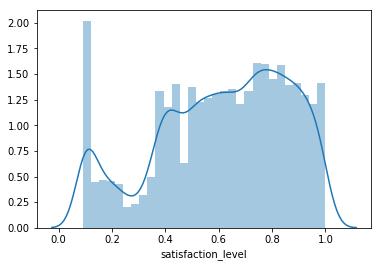

In [5]:
sns.distplot(hr['satisfaction_level'])

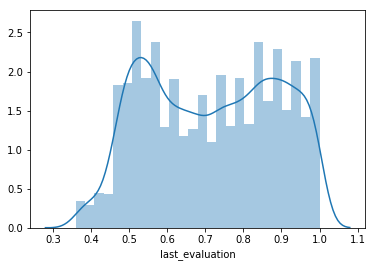

In [6]:
sns.distplot(hr['last_evaluation'])

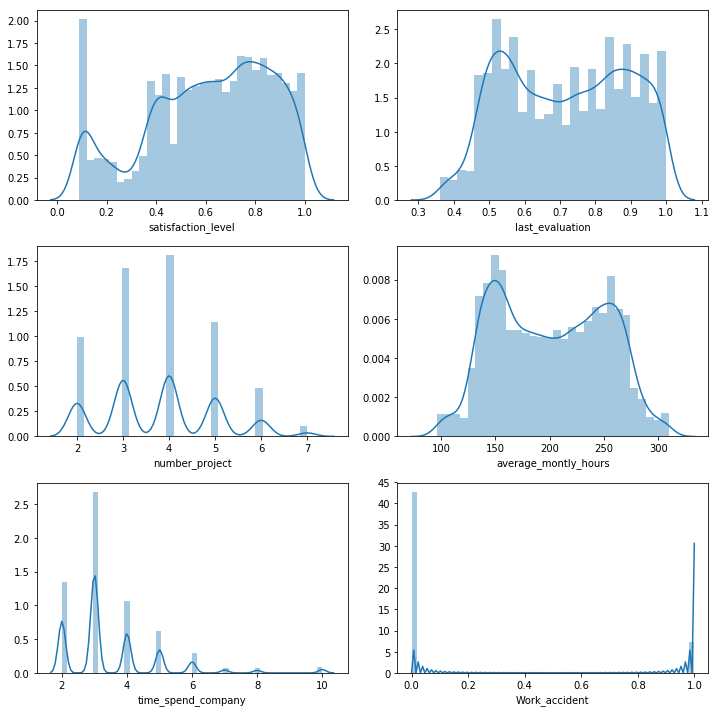

In [7]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
sns.distplot(hr['satisfaction_level'], ax=ax[0,0])
sns.distplot(hr['last_evaluation'],ax=ax[0,1])
sns.distplot(hr['number_project'], ax=ax[1,0])
sns.distplot(hr['average_montly_hours'],ax=ax[1,1])
sns.distplot(hr['time_spend_company'],ax=ax[2,0])
sns.distplot(hr['Work_accident'],ax=ax[2,1])
plt.tight_layout()
plt.show()


C:\Users\vasis\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vasis\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


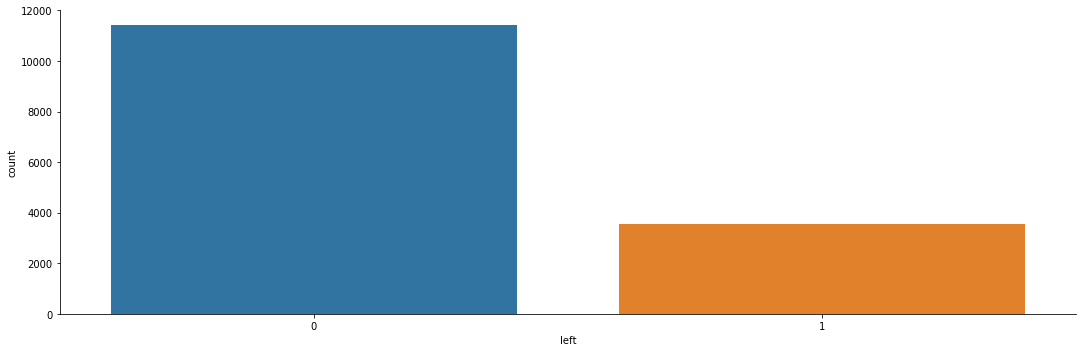

In [8]:
sns.factorplot(data=hr, kind='count', x='left', size= 5, aspect =3)

C:\Users\vasis\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vasis\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


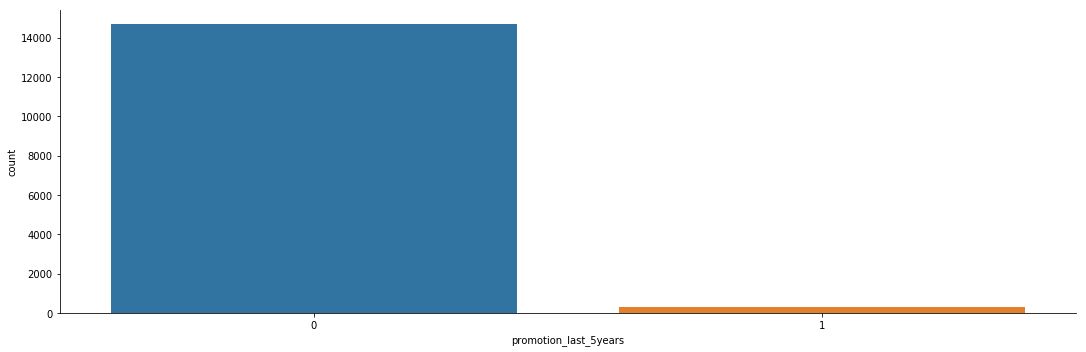

In [9]:
sns.factorplot(data=hr, kind='count', x='promotion_last_5years', size= 5, aspect =3)

C:\Users\vasis\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vasis\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


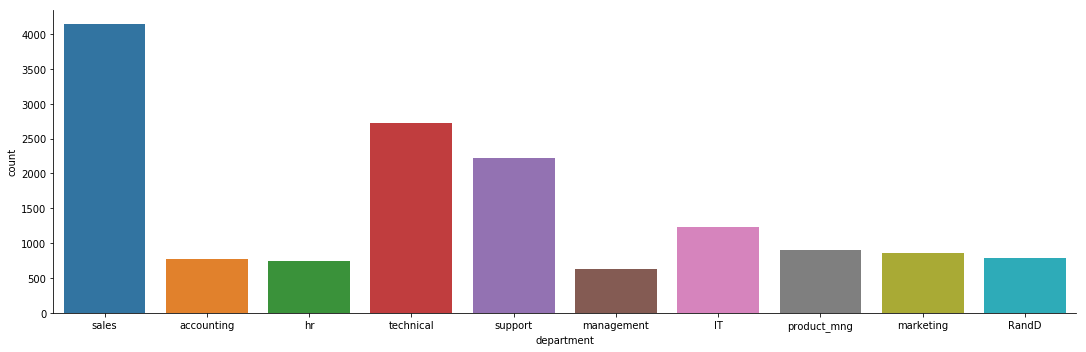

In [10]:
sns.factorplot(data=hr, kind='count', x='department', size= 5, aspect =3)

C:\Users\vasis\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vasis\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


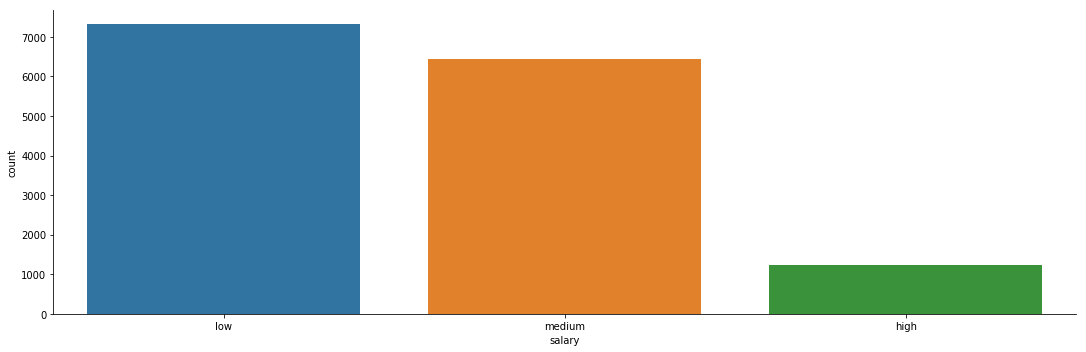

In [11]:
sns.factorplot(data=hr, kind='count', x='salary' , size= 5, aspect =3)

In [9]:
#converting categorical into encoding
f=['department','salary']
hr=pd.get_dummies(hr, columns=f)

In [10]:

# Step 1 Split to train and test
x=hr.drop(['left'], axis=1).values
y=hr['left'].values

In [11]:
print (x)

print (y)


[[0.38 0.53 2.   ... 0.   1.   0.  ]
 [0.8  0.86 5.   ... 0.   0.   1.  ]
 [0.11 0.88 7.   ... 0.   0.   1.  ]
 ...
 [0.37 0.53 2.   ... 0.   1.   0.  ]
 [0.11 0.96 6.   ... 0.   1.   0.  ]
 [0.37 0.52 2.   ... 0.   1.   0.  ]]
[1 1 1 ... 1 1 1]


In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

# 2nd Step aplying standard scalar stanadardised the units making mean of all the features = 1 and SD =0


#normalisation will change the distribution while standardisation will not change

In [14]:
sc=StandardScaler()
x_train=sc.fit_transform (x_train)
x_test=sc.fit_transform(x_test)


# Step No :3  setting up network Topology

In [15]:
import keras 

from keras.models import Sequential
#sequential to build sequential model

from keras.layers import Dense


Using TensorFlow backend.


In [16]:
classifier = Sequential()
#initialising sequential object

W0630 13:07:49.689366  8064 deprecation_wrapper.py:119] From C:\Users\vasis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [17]:
# 9 inputs are there hence we need 9 neurons. To decide on no of neurons in the input layer check the no of input features 
#and assign it as no of neurons
#setting up input layer
classifier.add(Dense(9, activation='relu',input_dim=20))

#if the no of features are different after one hot encoding specifying input dimensions is important.

W0630 13:07:51.266808  8064 deprecation_wrapper.py:119] From C:\Users\vasis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 13:07:51.272805  8064 deprecation_wrapper.py:119] From C:\Users\vasis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [20]:
hr.shape
#above we've added input dimension as 20 , as we removed the target variable

(14999, 21)

In [18]:
#setting up output layer, in the output lay either should be softmac or sigmoid, sigmoid will be integrated with softmac
classifier.add(Dense(1,activation='sigmoid'))

In [19]:
#setting up optimizer or lost function.
# the bleow is actually back propagation step. breaking the below statement down optimizer is basically a gradient decent 
#functionwhich is used for finding local minima , the parameters can be set to optimisation functions 
#like either adam or rms_prop/RMS_prop
#Loss function refers to the function that minimises the error to seek the optimal out put this is done using  reduction in
#variance method.
#we have used binary cross entropy because the prediction is of type binary classification. for multi class classification
#categorical cross entropy. the final argument metrics is for measuringthe model performance and here we're using Accuracy for
#measurement of performace

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

W0630 13:07:55.679032  8064 deprecation_wrapper.py:119] From C:\Users\vasis\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 13:07:55.722009  8064 deprecation_wrapper.py:119] From C:\Users\vasis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0630 13:07:55.734010  8064 deprecation.py:323] From C:\Users\vasis\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
#fitting the neural network to train data

classifier.fit(x_train, y_train, batch_size=10, epochs=10)

W0630 11:55:51.584155  4156 deprecation_wrapper.py:119] From C:\Users\vasis\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
10499/10499 [==============================] - 3s 260us/step - loss: 0.4452 - acc: 0.7953
Epoch 2/10
10499/10499 [==============================] - 2s 153us/step - loss: 0.3175 - acc: 0.8439
Epoch 3/10
10499/10499 [==============================] - 2s 160us/step - loss: 0.2550 - acc: 0.9014
Epoch 4/10
10499/10499 [==============================] - 2s 157us/step - loss: 0.2214 - acc: 0.9349
Epoch 5/10
10499/10499 [==============================] - 2s 179us/step - loss: 0.2015 - acc: 0.9480
Epoch 6/10
10499/10499 [==============================] - 2s 231us/step - loss: 0.1901 - acc: 0.9528
Epoch 7/10
10499/10499 [==============================] - 2s 231us/step - loss: 0.1833 - acc: 0.9530
Epoch 8/10
10499/10499 [==============================] - 2s 225us/step - loss: 0.1789 - acc: 0.9534 1s - lo
Epoch 9/10
10499/10499 [==============================] - 2s 211us/step - loss: 0.1757 - acc: 0.9538
Epoch 10/10
10499/10499 [==============================] - 2s 210us/step - loss: 0.

In [24]:
# Predicting the output for x tests

y_pred=classifier.predict(x_test)

In [25]:
y_pred=(y_pred>0.5)

# we are taking more than 50 % as 1 and lett than 50 % is 0.

In [1]:
from sklearn.metrics import confusion_matrix


In [20]:
confusion_matrix(y_test, y_pred)

NameError: name 'confusion_matrix' is not defined

In [28]:
(3408+496)/(3408+44+552+496)
#check the note True positive need to check 

0.8675555555555555

In [29]:
#Cross fold Validation:- commonly known as CV validation is a technique used to split the training and testing data 
#inorder to avoid the problem of data bias.

In [30]:
#Running neural networks using  CV validation to improve the accuracy.
from sklearn.model_selection import cross_val_score

In [60]:
from keras.layers import Dropout
def make_classifier():
    classifier = Sequential()
    classifier.add(Dense(9, activation='relu',input_dim=20))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

AttributeError: 'KerasClassifier' object has no attribute 'summary'

In [61]:
from keras.wrappers.scikit_learn import KerasClassifier
classifier=KerasClassifier(build_fn=make_classifier, batch_size=10, nb_epoch=1)
# classifier is model name
classifier.model.summary()

AttributeError: 'KerasClassifier' object has no attribute 'model'

In [62]:
acc=cross_val_score(estimator=classifier, X= x_train, y=y_train, cv=10)

Epoch 1/1
1050/1050 [==============================] - 1s 618us/step
Epoch 1/1
1050/1050 [==============================] - 1s 634us/step
Epoch 1/1
1050/1050 [==============================] - 1s 665us/step
Epoch 1/1
1050/1050 [==============================] - 1s 730us/step
Epoch 1/1
1050/1050 [==============================] - 1s 987us/step
Epoch 1/1
1050/1050 [==============================] - 1s 740us/step
Epoch 1/1
1050/1050 [==============================] - 1s 795us/step
Epoch 1/1
1050/1050 [==============================] - 1s 770us/step
Epoch 1/1
1050/1050 [==============================] - 1s 819us/step
Epoch 1/1
1049/1049 [==============================] - 1s 1ms/step


In [58]:
avg_acc=acc.mean()
avg_acc

0.83655608025534

In [35]:
acc_var= acc.var()

In [36]:
acc_var

0.0005413236452695073

In [63]:
classifier.fit(x_train,y_train,batch_size=10,nb_epoch=10)

C:\Users\vasis\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py:152: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  history = self.model.fit(x, y, **fit_args)


Epoch 1/10
10499/10499 [==============================] - 5s 463us/step - loss: 0.4648 - acc: 0.7625
Epoch 2/10
10499/10499 [==============================] - 3s 282us/step - loss: 0.3226 - acc: 0.8513
Epoch 3/10
10499/10499 [==============================] - 3s 313us/step - loss: 0.2494 - acc: 0.9025
Epoch 4/10
10499/10499 [==============================] - 3s 312us/step - loss: 0.2189 - acc: 0.9191
Epoch 5/10
10499/10499 [==============================] - 3s 251us/step - loss: 0.2098 - acc: 0.9228
Epoch 6/10
10499/10499 [==============================] - 3s 243us/step - loss: 0.2003 - acc: 0.9294
Epoch 7/10
10499/10499 [==============================] - 3s 266us/step - loss: 0.1953 - acc: 0.9325
Epoch 8/10
10499/10499 [==============================] - 3s 273us/step - loss: 0.1918 - acc: 0.9335
Epoch 9/10
10499/10499 [==============================] - 3s 253us/step - loss: 0.1891 - acc: 0.9352
Epoch 10/10
10499/10499 [==============================] - 3s 252us/step - loss: 0.1898 - a

In [64]:
classifier.model.summary()
confusion_matrix(y_test,y_pred)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 9)                 189       
_________________________________________________________________
dropout_22 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 10        
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


array([[3351,   98],
       [ 122,  929]], dtype=int64)

In [42]:
(3351+929)/(3351+98+122+929)

0.9511111111111111

In [66]:
#applying recursive function for logistic regression

In [3]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#RFE is feature reduction algorythm where we specify the top number of features 
#needed for building a model from nfeatures present in the data
rfe=RFE(LogisticRegression(),5)

In [29]:
from sklearn import metrics

In [30]:
rfe=rfe.fit(x,y)

C:\Users\vasis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vasis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vasis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vasis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vasis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [28]:
x=hr.drop(['left'],axis=1).values
temp=hr.drop(['left'],axis=1)
temp.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [31]:
print(rfe.support_)

[ True False False False False  True  True False  True False False False
 False False False False False  True False False]


In [33]:
print(rfe.ranking_)

[ 1  6  8 16  5  1  1 14  1 11  4  3 12 15 13 10  9  1  2  7]


In [36]:
vars=['satisfaction_level','Work_accident','promotion_last_5years','department_IT','salary_high']

In [37]:
X=hr[vars]

In [42]:
model=LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3)
model.fit(X_train,Y_train)

C:\Users\vasis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [1]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

NameError: name 'Y_test' is not defined

In [ ]:
from sklearn import svm
>>> X = [[0, 0], [1, 1]]
>>> y = [0, 1]
>>> clf = svm.SVC(gamma='scale')
>>> clf.fit(X, y)  